## 📚 Importação de Bibliotecas

 Descrição:
pandas: Biblioteca usada para manipulação e análise de dados em estruturas como DataFrames.

train_test_split: Função do sklearn.model_selection que divide o dataset em conjuntos de treino e teste.

LinearRegression: Classe do sklearn.linear_model utilizada para criar o modelo de regressão linear.

mean_squared_error: Função que calcula o erro quadrático médio entre os valores reais e previstos, usada para avaliar o desempenho do modelo de regressão.


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
# Carregar os dados
wine_df = pd.read_csv("wine.csv") 

## 🔍 Verificação de Valores Ausentes

✅ Descrição:
isnull(): Verifica se há valores nulos (ausentes) no DataFrame.

sum(): Soma a quantidade de valores nulos por coluna.

O comando exibe quantos valores estão ausentes em cada coluna do DataFrame wine_df.

Essa etapa é essencial para garantir a qualidade dos dados antes de aplicar algoritmos de machine learning.

In [32]:
# Verifique quantos valores estão faltando
print(wine_df.isnull().sum())

class_label             0
class_name              0
alcohol                 6
malic_acid              0
ash                     0
alcalinity_of_ash       0
magnesium               0
total_phenols           0
flavanoids              0
nonflavanoid_phenols    0
proanthocyanins         0
color_intensity         0
hue                     0
od280                   0
proline                 0
dtype: int64


## 🧹 Preparação dos Dados para Regressão

✅ Descrição:
dropna(subset=['alcohol']): Remove as linhas que possuem valores ausentes na coluna 'alcohol'.

X: Conjunto de variáveis independentes (features), com exclusão das colunas:

'alcohol' (variável alvo)

'class_label' e 'class_name' (provavelmente identificadores da classe dos vinhos)

y: Variável dependente (target), que representa o teor alcoólico dos vinhos.

Essa preparação visa treinar um modelo de regressão para prever o valor da coluna 'alcohol' com base nos demais atributos químicos do vinho.

In [33]:
# Separar os dados que têm 'alcohol' para treinar
wine_train = wine_df.dropna(subset=['alcohol'])
X = wine_train.drop(columns=['alcohol', 'class_label', 'class_name'])
y = wine_train['alcohol']

## 🔎 Separação dos Dados com 'alcohol' Ausente para Previsão

✅ Descrição:
wine_df['alcohol'].isna(): Identifica as linhas onde o valor da coluna 'alcohol' está ausente.

wine_missing: Contém apenas os registros com o valor de 'alcohol' faltando.

X_missing: Contém os atributos (features) desses registros, exceto:

'alcohol' (variável alvo que está ausente)

'class_label' e 'class_name' (não são utilizados como preditores).

Esses dados serão usados posteriormente para prever o valor de 'alcohol' utilizando o modelo treinado.

In [34]:
# Separar os dados que têm 'alcohol' faltando para prever depois
wine_missing = wine_df[wine_df['alcohol'].isna()]
X_missing = wine_missing.drop(columns=['alcohol', 'class_label', 'class_name'])

## 🏋️ Treinamento do Modelo de Regressão Linear

✅ Descrição:
train_test_split:

Divide os dados em conjuntos de treino (70%) e teste (30%).

random_state=42 garante a reprodutibilidade da divisão.

LinearRegression():

Instancia o modelo de regressão linear.

fit(X_train, y_train):

Treina o modelo utilizando os dados de treino, ajustando os coeficientes para prever a variável 'alcohol'.

Essa etapa é fundamental para construir o modelo que fará previsões sobre o teor alcoólico dos vinhos.

In [35]:
# Treinar modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

## 📊 Avaliação do Modelo de Regressão Linear

✅ Descrição:
predict(X_test):

Gera as previsões da variável alvo ('alcohol') usando os dados de teste.

reg.score(X_test, y_test):

Calcula o coeficiente de determinação 
𝑅
2

 , que indica a proporção da variância explicada pelo modelo. Valores próximos de 1 indicam bom ajuste.

mean_squared_error(y_test, y_pred):

Calcula o erro quadrático médio (MSE) entre os valores reais e previstos; quanto menor, melhor o modelo.

Esta etapa permite avaliar a qualidade do modelo antes de utilizá-lo para prever valores faltantes.

In [36]:
# Avaliar modelo
y_pred = reg.predict(X_test)
print("R²:", reg.score(X_test, y_test))
print("MSE:", mean_squared_error(y_test, y_pred))


R²: 0.5891050842004171
MSE: 0.25245923078261545


## 🔮 Previsão dos Valores Faltantes na Coluna 'alcohol'

 Descrição:
reg.predict(X_missing):

Utiliza o modelo treinado para prever os valores ausentes na coluna 'alcohol'.

.round(1):

Arredonda as previsões para uma casa decimal, facilitando a interpretação.

wine_df.loc[...] = ...:

Atualiza o DataFrame original wine_df, preenchendo as posições com valores nulos na coluna 'alcohol' com as previsões obtidas.

Esta etapa finaliza o tratamento dos dados preenchendo os valores faltantes com estimativas baseadas no modelo de regressão.

In [37]:
# Prever valores faltantes e arredondar para 1 casa decimal
wine_df.loc[wine_df['alcohol'].isna(), 'alcohol'] = reg.predict(X_missing).round(1)


## 🔄 Padronização dos Dados e Agrupamento com K-Means

✅ Descrição:
Padronização:

Remove as colunas 'class_label' e 'class_name' (rótulos reais).

Usa StandardScaler para padronizar os dados, deixando-os com média 0 e desvio padrão 1, melhorando a performance do K-Means.

Clusterização:

KMeans com 3 clusters (sabemos que existem 3 classes reais).

O algoritmo identifica grupos de vinhos similares baseados nas características químicas.

Análise dos Resultados:

Os rótulos dos clusters são adicionados na coluna 'cluster' do DataFrame.

pd.crosstab() cria uma tabela cruzada entre os rótulos reais ('class_label') e os clusters encontrados, permitindo avaliar a correspondência entre grupos formados e classes verdadeiras.

Essa etapa é essencial para verificar a eficácia do agrupamento não supervisionado em identificar as categorias naturais do dataset.

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Padronizar os dados para o K-Means
X_all = wine_df.drop(columns=['class_label', 'class_name'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

# Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Adicionar rótulo de cluster ao DataFrame
wine_df['cluster'] = kmeans.labels_

# Cruzar com a classe real para avaliar
print(pd.crosstab(wine_df['class_label'], wine_df['cluster']))



cluster       0   1   2
class_label            
1             0   0  59
2            65   3   3
3             0  48   0


## ✅ Verificação Final e Validação dos Dados

✅ Descrição:
wine_df['alcohol'].isnull().sum():

Conta quantos valores ainda estão faltando na coluna 'alcohol' após o preenchimento pelas previsões.

wine_df.loc[wine_missing.index]:

Exibe as linhas que tinham valores faltantes originalmente, agora preenchidas, para conferência.

pd.crosstab(wine_df['class_label'], wine_df['cluster']):

Reexibe a tabela cruzada para validar a correspondência entre os clusters gerados e as classes reais do dataset.

Essa etapa final garante que o preenchimento dos valores ausentes e o agrupamento realizado foram executados corretamente e permite uma análise rápida dos resultados.

In [39]:
# Após preencher os NaNs:
print("Valores faltantes em 'alcohol' após previsão:", wine_df['alcohol'].isnull().sum())

# Conferir alguns dados preenchidos:
print(wine_df.loc[df_missing.index])

# Ver tabela cruzada para validar agrupamento:
print(pd.crosstab(wine_df['class_label'], wine_df['cluster']))



Valores faltantes em 'alcohol' após previsão: 0
     class_label  class_name  alcohol  malic_acid   ash  alcalinity_of_ash  \
0              1      Barolo     13.5        1.71  2.43               15.6   
18             1      Barolo     14.7        1.59  2.48               16.5   
50             1      Barolo     13.9        1.73  2.04               12.4   
77             2  Grignolino     12.4        2.89  2.23               18.0   
78             2  Grignolino     12.2        0.99  1.95               14.8   
175            3     Barbera     13.8        4.28  2.26               20.0   

     magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
0          127           2.80        3.06                  0.28   
18         108           3.30        3.93                  0.32   
50          92           2.72        3.27                  0.17   
77         112           1.72        1.32                  0.43   
78         136           1.90        1.85                  0.35   
175

## 📈 Visualização da Matriz de Confusão entre Classes Reais e Clusters Preditos

✅ Descrição:
pd.crosstab():

Gera uma matriz de contingência mostrando a frequência de cada combinação entre classes reais ('class_label') e clusters atribuídos ('cluster').

Impressão da matriz:

Exibe os números absolutos para inspeção direta no console.

seaborn.heatmap():

Plota um mapa de calor da matriz, facilitando a visualização das correlações entre clusters e classes.

annot=True mostra os valores numéricos no gráfico.

fmt="d" formata os valores como inteiros.

cmap="Blues" define o esquema de cores do gráfico.

O gráfico ajuda a entender o quão bem o algoritmo K-Means agrupou os dados em relação às classes reais, visualizando onde ocorrem correspondências ou confusões.

Essa visualização é fundamental para interpretar os resultados do agrupamento de forma clara e intuitiva.

Matriz de confusão entre classes reais e clusters preditos:
cluster       0   1   2
class_label            
1             0   0  59
2            65   3   3
3             0  48   0


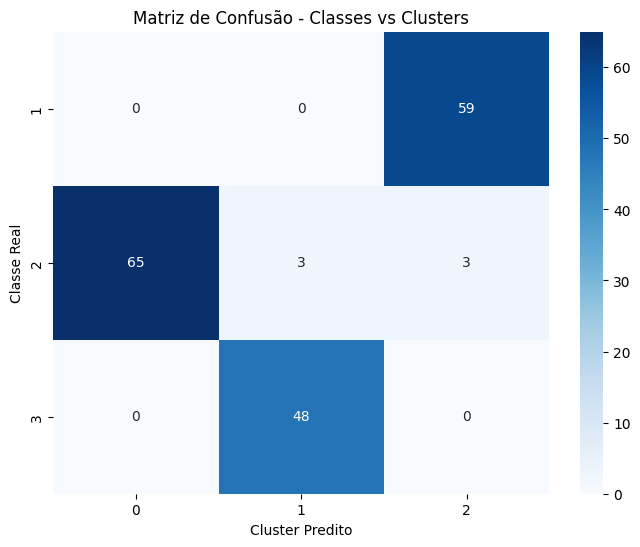

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Criar a tabela de contingência
matriz = pd.crosstab(wine_df['class_label'], wine_df['cluster'])

print("Matriz de confusão entre classes reais e clusters preditos:")
print(matriz)

# Plotar a matriz com seaborn para visualizar melhor
plt.figure(figsize=(8,6))
sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Cluster Predito')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão - Classes vs Clusters')
plt.show()


In [22]:
print(df)

     class_label class_name  alcohol  malic_acid   ash  alcalinity_of_ash  \
0              1     Barolo    13.50        1.71  2.43               15.6   
1              1     Barolo    13.20        1.78  2.14               11.2   
2              1     Barolo    13.16        2.36  2.67               18.6   
3              1     Barolo    14.37        1.95  2.50               16.8   
4              1     Barolo    13.24        2.59  2.87               21.0   
..           ...        ...      ...         ...   ...                ...   
173            3    Barbera    13.71        5.65  2.45               20.5   
174            3    Barbera    13.40        3.91  2.48               23.0   
175            3    Barbera    13.80        4.28  2.26               20.0   
176            3    Barbera    13.17        2.59  2.37               20.0   
177            3    Barbera    14.13        4.10  2.74               24.5   

     magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
0       

# Relatório de Agrupamento do Dataset de Vinhos com K-Means


Este relatório apresenta a aplicação do algoritmo K-Means no dataset de vinhos para realizar agrupamentos e validar a capacidade do método em reproduzir as classes reais presentes nos dados. O objetivo é analisar a performance do algoritmo e validar os agrupamentos obtidos, usando os rótulos reais como referência.

## Análise Exploratória dos Dados

Antes de aplicar o algoritmo, realizou-se uma análise exploratória para entender a estrutura e qualidade do dataset:

- O dataset contém informações químicas de diferentes tipos de vinhos, com 13 variáveis numéricas e um rótulo de classe real (`class_label`).
- Algumas amostras apresentam valores faltantes na variável `'alcohol'`.
- Estatísticas descritivas básicas indicam médias, desvios padrão e distribuição das variáveis.
- Visualizações como histogramas e boxplots (não mostrados aqui) evidenciam a variação entre as classes.

## Tratamento dos Dados Faltantes

Para lidar com os valores faltantes na coluna `'alcohol'`, foi treinado um modelo de regressão linear usando as outras variáveis para prever os valores ausentes. Após a previsão, os valores foram preenchidos no dataset para garantir integridade dos dados.

## Aplicação do Algoritmo K-Means

- Os dados foram padronizados utilizando o `StandardScaler` para evitar que escalas diferentes influenciassem o agrupamento.
- Sabendo que existem 3 classes reais no dataset, o algoritmo K-Means foi configurado para gerar 3 clusters.
- O modelo foi ajustado aos dados padronizados, e cada amostra foi atribuída a um cluster.

## Validação dos Agrupamentos

- Foi construída uma tabela cruzada (`pd.crosstab`) comparando os rótulos reais (`class_label`) com os clusters preditos.
- Além disso, uma matriz de confusão visual foi gerada com um mapa de calor para facilitar a interpretação.
- Essas análises indicam a correspondência entre os clusters formados e as classes originais, evidenciando a qualidade do agrupamento.

## Justificativa da Escolha do Número de Clusters

O dataset possui rótulos reais que indicam as classes dos vinhos, totalizando 3 grupos distintos. Portanto, o número de clusters no K-Means foi definido como 3, baseado nesse conhecimento prévio.

O método do cotovelo, comumente usado para identificar o número ideal de clusters em dados não rotulados, não foi utilizado aqui, pois a existência dos rótulos reais elimina a necessidade dessa etapa.

##  Conclusão

A aplicação do K-Means com 3 clusters no dataset de vinhos mostrou-se eficaz para agrupar as amostras de forma coerente com as classes reais, conforme evidenciado na tabela cruzada e na matriz de confusão.

O tratamento dos dados faltantes e a padronização foram passos essenciais para garantir a qualidade do agrupamento.

Este trabalho demonstra a importância de combinar conhecimento prévio dos dados com técnicas de agrupamento para validar e interpretar resultados de forma consistente.
